In [1]:
################################
# LIBRARIES
################################
from functionshelper import *
from functionssessions import *
import matplotlib.pyplot as plt

# Matplotlib settings
plt.style.use("seaborn")

params = {
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "axes.labelsize": 20,
    "legend.fontsize": 20,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "text.usetex": False,
    "figure.figsize": [10, 5],
    "axes.grid": True,
}

plt.rcParams.update(params)
plt.close("all")

%matplotlib inline

In [3]:
################################
# SETUP
################################
fig_folder = f'figures/'
df = get_computed_sessions()

df

,Session Id,Timestamp,Date,Time,Station,PM2.5,Sensors
0,20210930-1,2021-09-30 07:09:47,2021-09-30,07:09:47,Angbyplan,8.080,2B
1,20210930-1,2021-09-30 07:14:22,2021-09-30,07:14:22,Åkeshov,8.055,2B
2,20210930-1,2021-09-30 07:19:04,2021-09-30,07:19:04,Brommaplan,7.885,2B
3,20210930-1,2021-09-30 07:22:29,2021-09-30,07:22:29,Abrahamsberg,7.365,2B
4,20210930-1,2021-09-30 07:25:48,2021-09-30,07:25:48,Stora mossen,8.355,2B
...,...,...,...,...,...,...,...
309,20210929-2,2021-09-29 17:51:31,2021-09-29,17:51:31,Alvik,5.410,2B
310,20210929-2,2021-09-29 17:56:14,2021-09-29,17:56:14,Stora mossen,5.420,2B
311,20210929-2,2021-09-29 18:02:10,2021-09-29,18:02:10,Abrahamsberg,5.335,2B
312,20210929-2,2021-09-29 18:08:04,2021-09-29,18:08:04,Brommaplan,4.450,2B


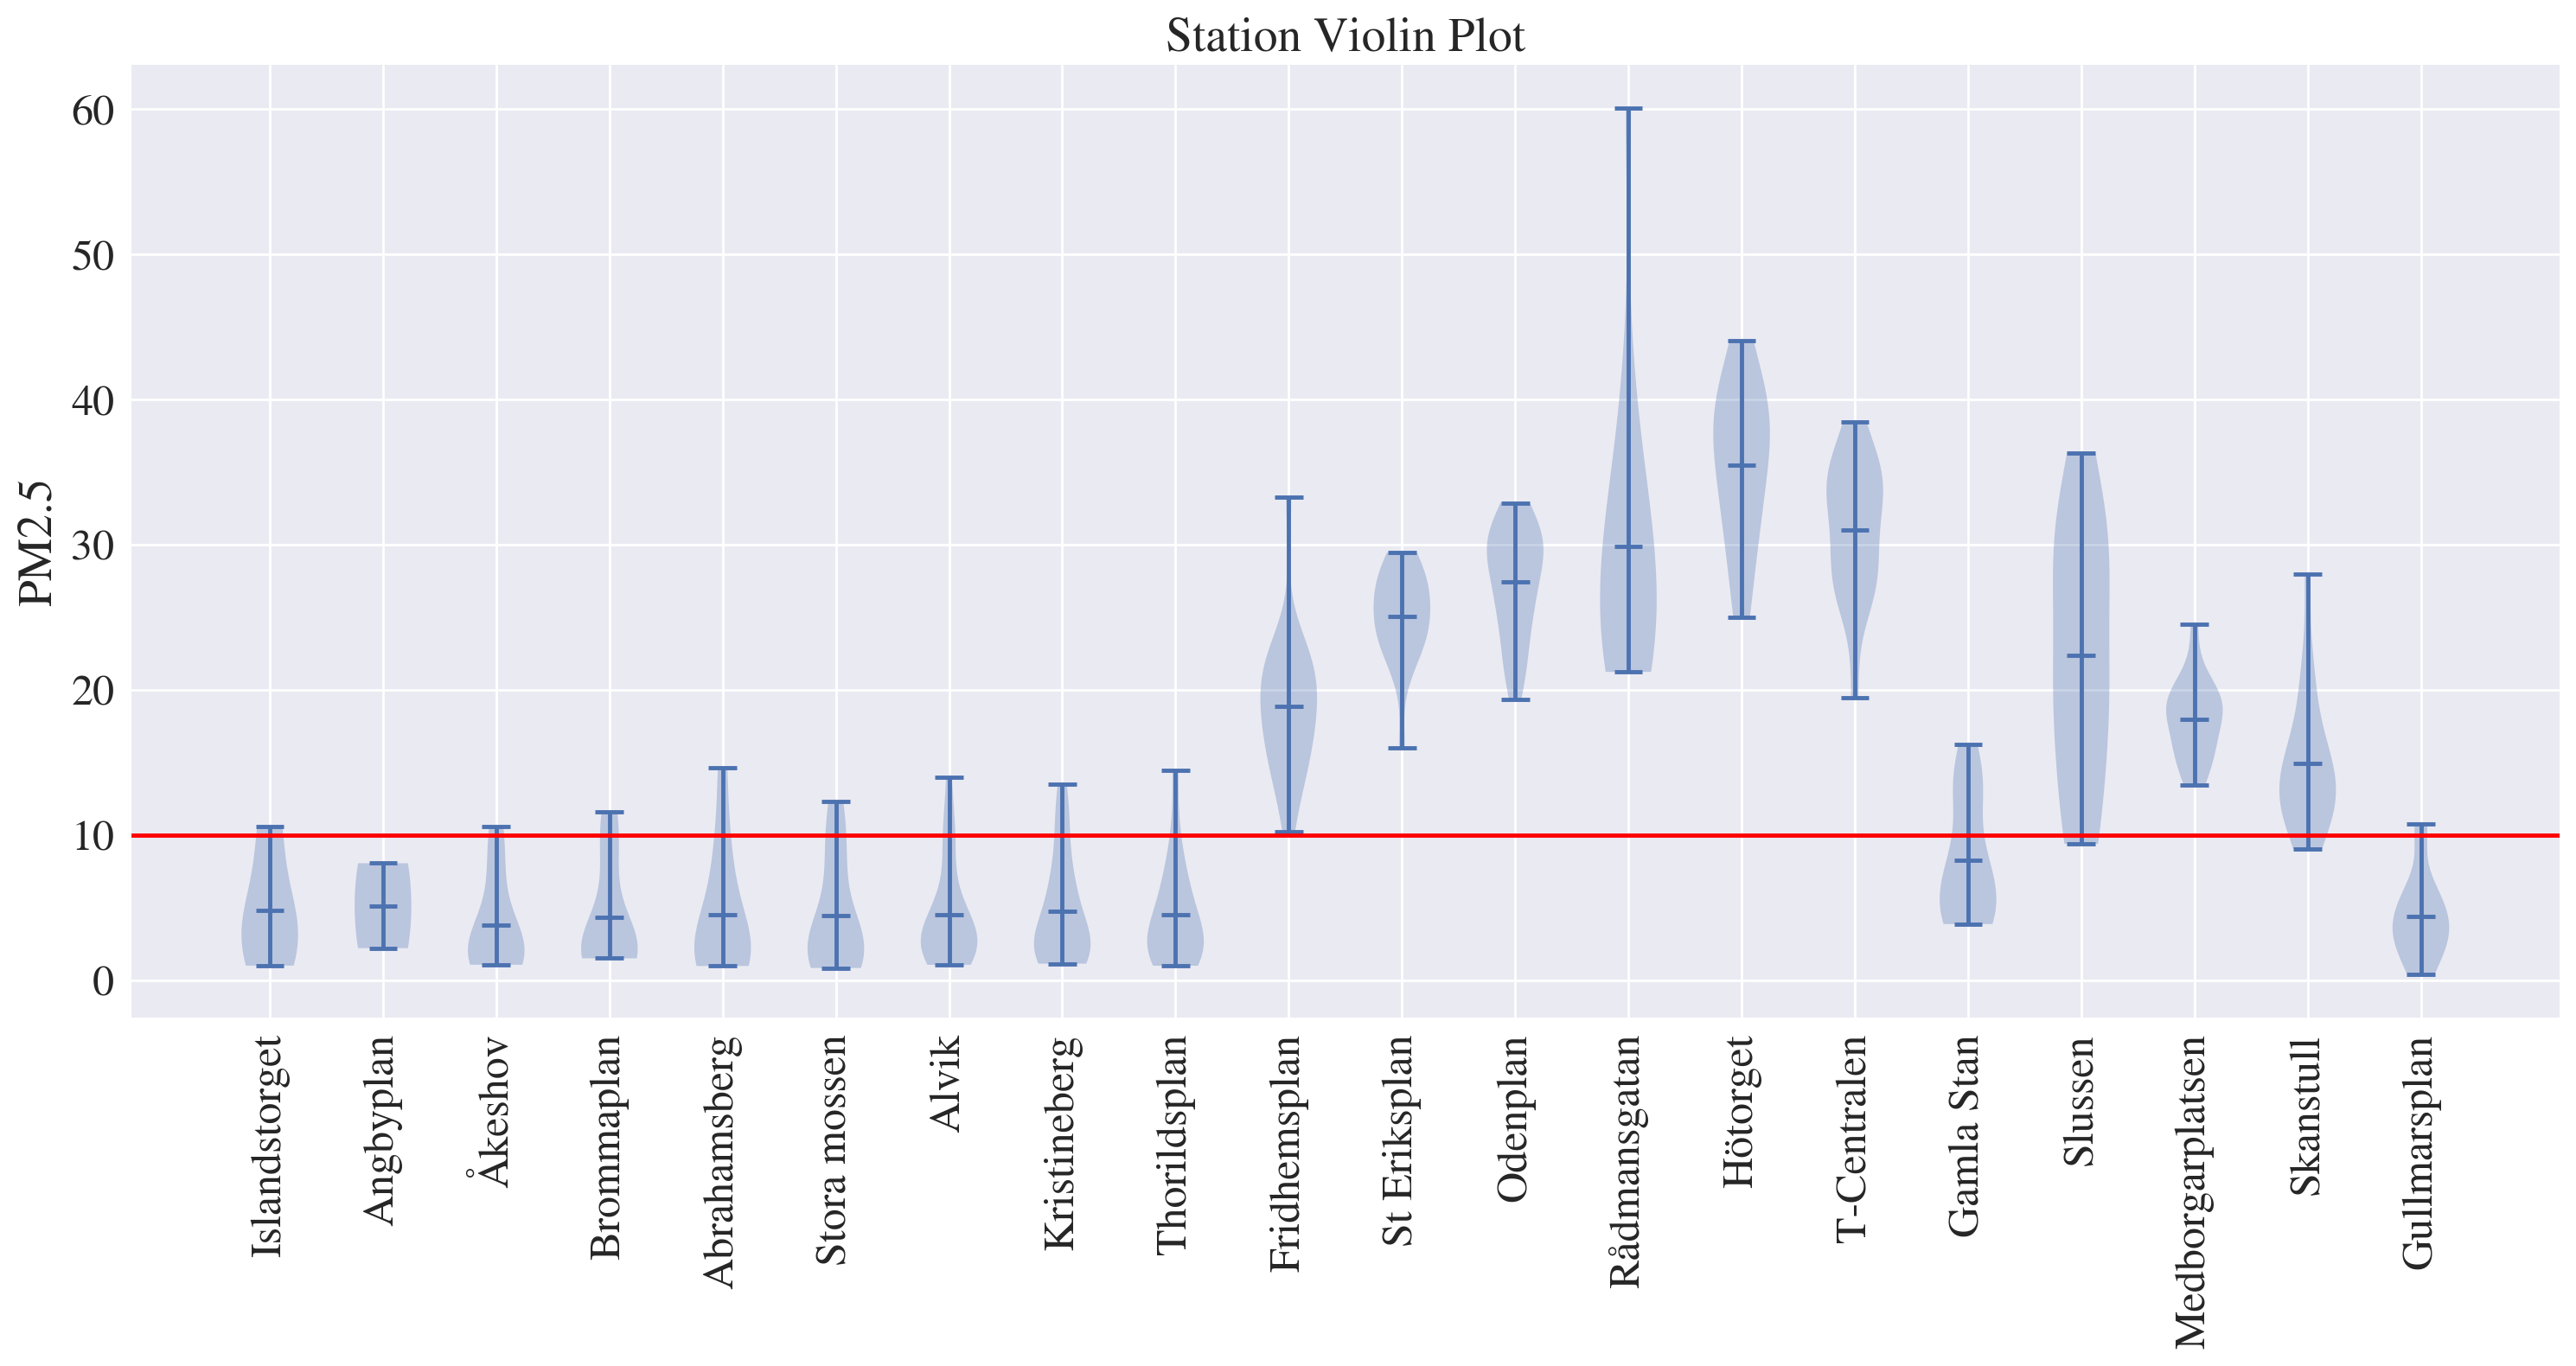

In [14]:
################################
# VIOLIN GRAPH ALL SESSIONS
################################

# Pick out values
station_collections = {}

for index, row in df.iterrows():
    if row['Station'] not in station_collections:
        station_collections[row['Station']] = []
        
    station_collections[row['Station']].append(row['PM2.5'])

    
# Sort by green line
green_line = get_green_line()

labels = []
collections = []

for s in green_line:
    if s in station_collections:
        labels.append(s)
        collections.append(station_collections[s])

fig, ax = plt.subplots(dpi=200, figsize=(15,8))

ax.set_title('Station Violin Plot', fontsize=20)
ax.set_ylabel('PM2.5')
plt.axhline(y=10, color='r', linestyle='-')

ax.violinplot(collections, showmeans=True, showextrema=True)

plt.xticks(list(range(1, len(labels) + 1)), labels, rotation=90)
plt.tight_layout()
#plt.savefig('figures/PaperV1/all_station_samples_violin_red_line.pdf')

plt.show()

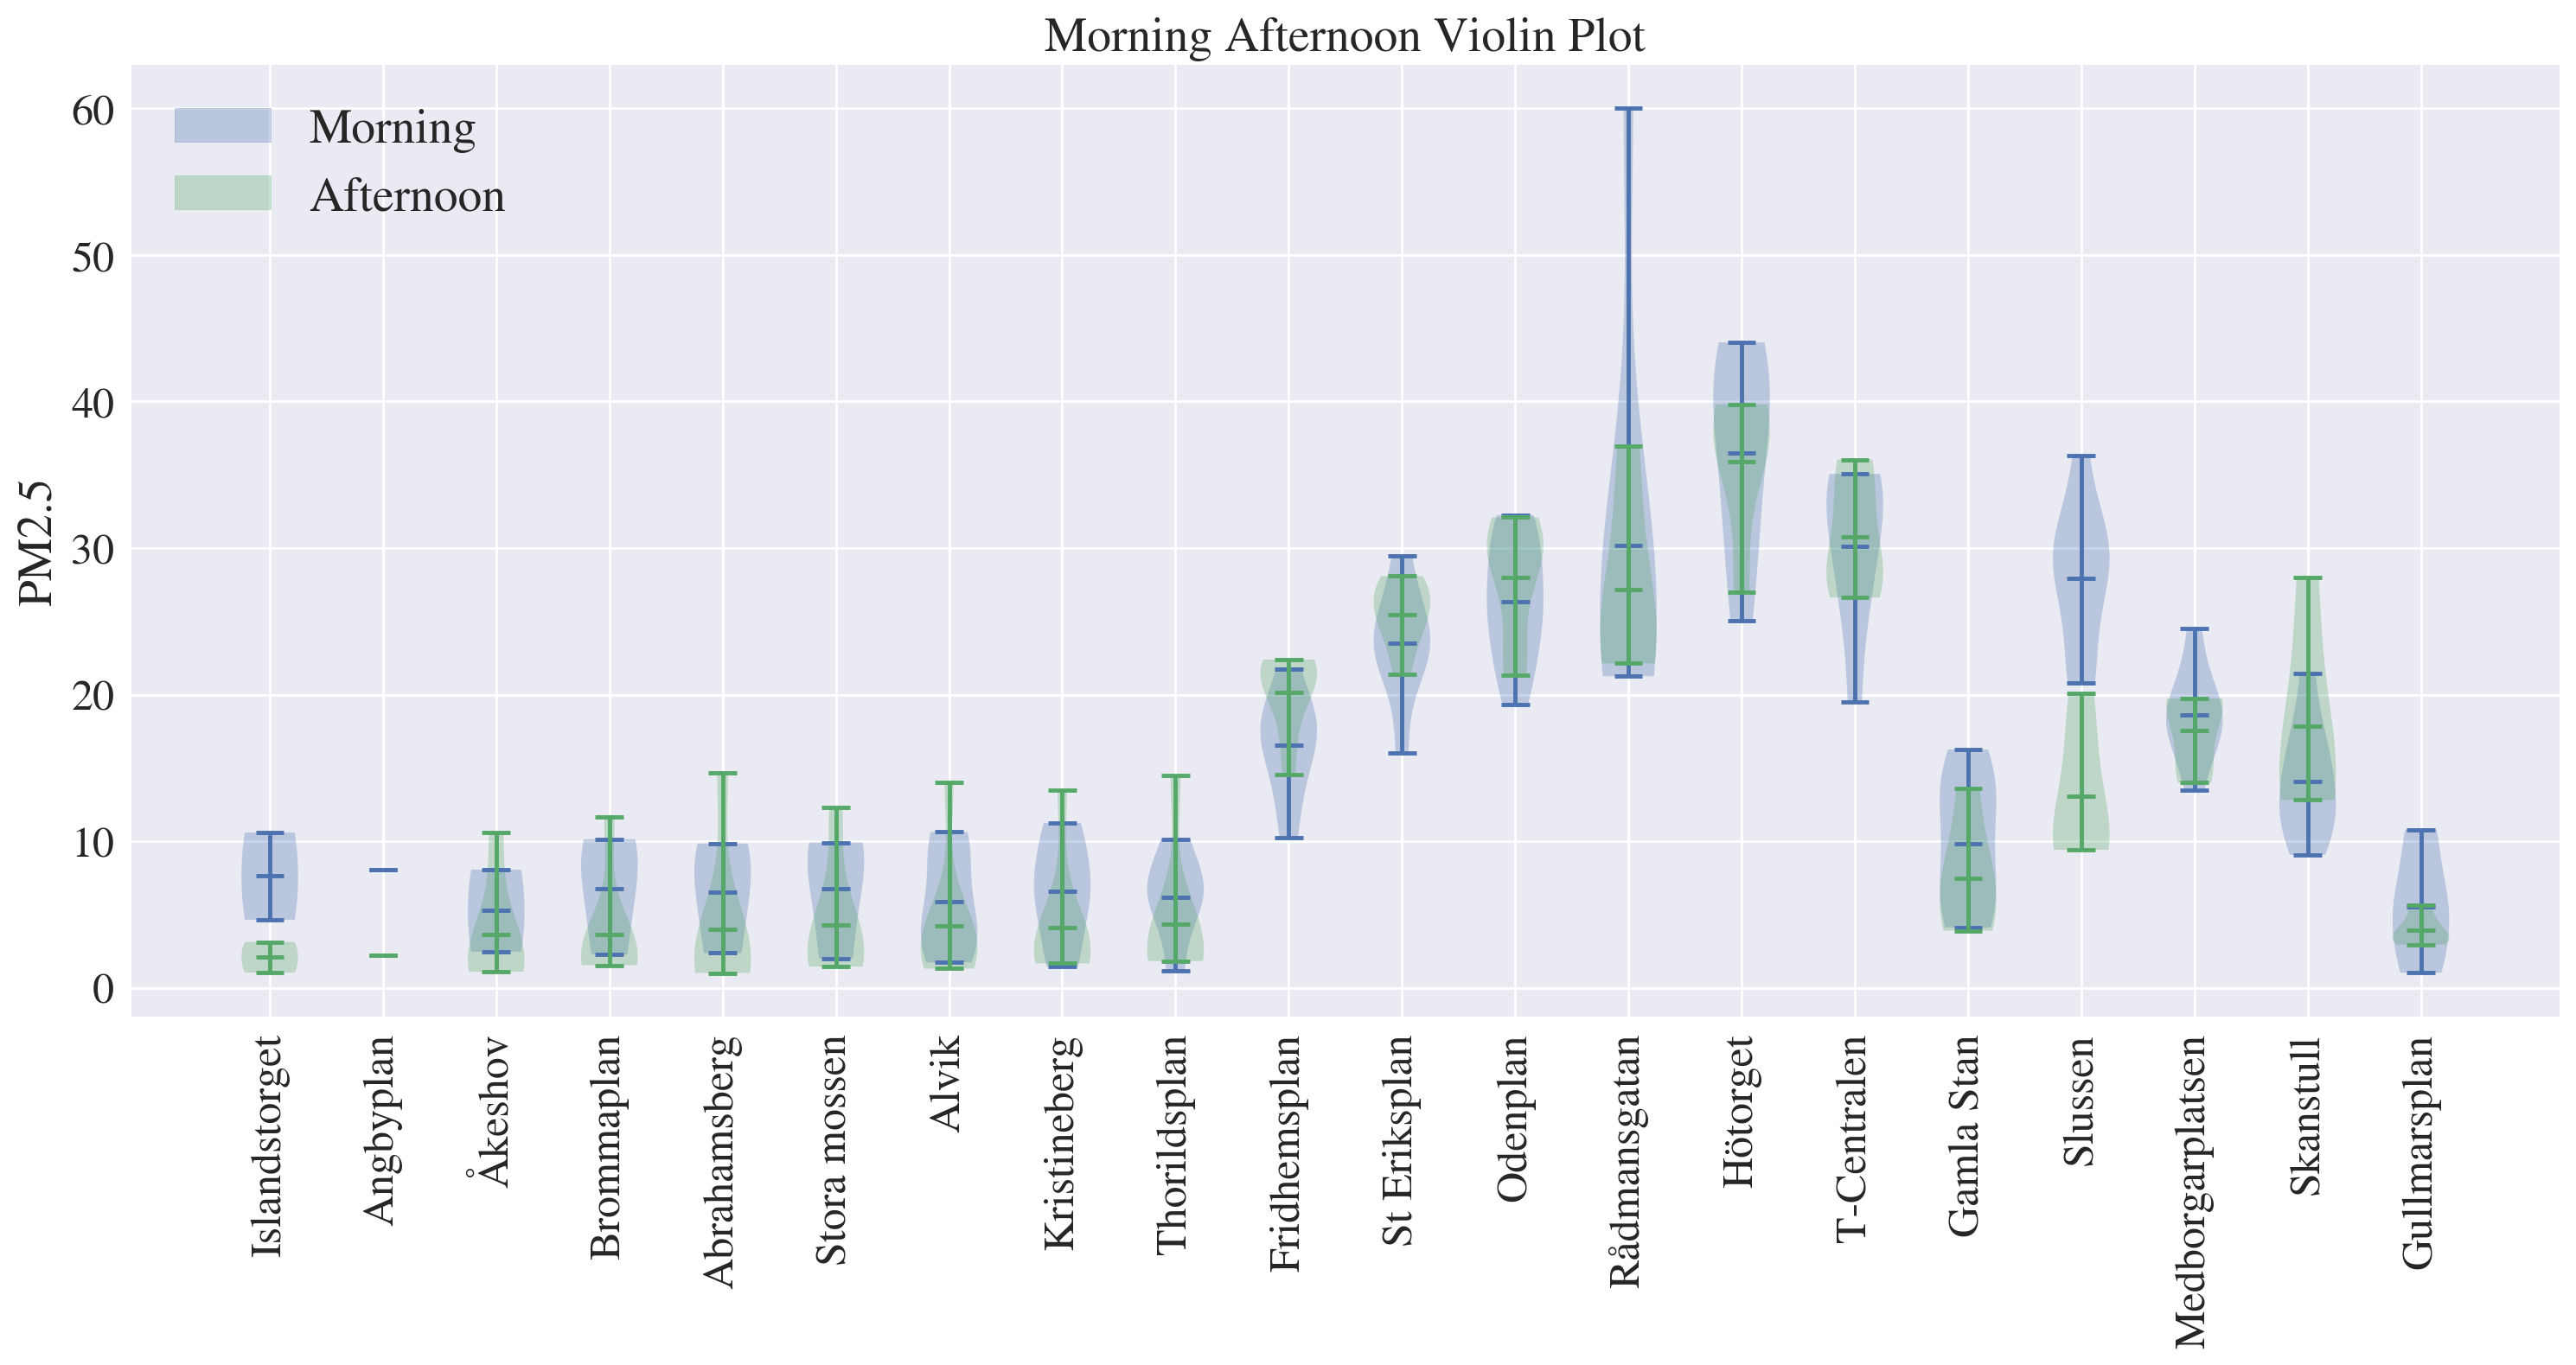

In [12]:
################################
# VIOLIN GRAPH MORNING EVENENING
################################

"""
A violin diagram of all station samples, sorted by morning and by afternoon
"""

# Rusningstrafik morgon
def get_time(timestr):
    return datetime.strptime(timestr, '%H:%M:%S').time()

def get_between(df, timestr1, timestr2):
    return df[(df['Time'] > get_time(timestr1)) & (df['Time'] < get_time(timestr2))]

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

morning_df = df[(df['Time'] > get_time('06:00:00')) & (df['Time'] < get_time('09:00:00'))]
evening_df = df[(df['Time'] > get_time('16:00:00')) & (df['Time'] < get_time('20:00:00'))]

# Pick out values
morning_collections = {}
evening_collections = {}

for index, row in morning_df.iterrows():    
    if row['Station'] not in morning_collections:
        morning_collections[row['Station']] = []
        
    morning_collections[row['Station']].append(row['PM2.5'])

for index, row in evening_df.iterrows():    
    if row['Station'] not in evening_collections:
        evening_collections[row['Station']] = []
        
    evening_collections[row['Station']].append(row['PM2.5'])
    
# Sort by green line
green_line = get_green_line()

m_labels = []
m_collections = []

e_labels = []
e_collections = []

for s in green_line:
    if s in morning_collections:
        m_labels.append(s)
        m_collections.append(morning_collections[s])

    if s in evening_collections:
        e_labels.append(s)
        e_collections.append(evening_collections[s])

fig, ax = plt.subplots(dpi=200, figsize=(15,8))

ax.set_title('Morning Afternoon Violin Plot', fontsize=20)
ax.set_ylabel('PM2.5')

add_label(ax.violinplot(m_collections, showmeans=True, showextrema=True), 'Morning')
add_label(ax.violinplot(e_collections, showmeans=True, showextrema=True), 'Afternoon')

plt.legend(*zip(*labels), loc=2)
#plt.axhline(y=10, color='r', linestyle='-')

plt.xticks(list(range(1, len(m_labels) + 1)), m_labels, rotation=90)
plt.tight_layout()
#plt.savefig('figures/PaperV1/morning_afternoon_violin.pdf')

plt.show()